# **Preprocessing**

In [5]:
# Installing prerequisites
!sudo apt install build-essential python3-dev swig git libosmesa6-dev libgl1-mesa-glx libglfw3 python3-pip graphviz
!sudo pip3 install ale-py atari-py AutoROM.accept-rom-license lz4 opencv-python pyvirtualdisplay pyglet importlib-resources Cython cffi glfw imageio lockfile pycparser pillow zipp gym
!sudo pip3 install sklearn graphviz matplotlib pandas tqdm
!git clone https://github.com/wau/keras-rl2.git
%cd keras-rl2
!sudo pip3 install .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
graphviz is already the newest version (2.40.1-2).
git is already the newest version (1:2.17.1-1ubuntu0.11).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libosmesa6 python-pip-whl python3-asn1crypto python3-cffi-backend
  python3-crypto python3-cryptography python3-idna python3-keyring
  python3-keyrings.alt python3-pkg-resources python3-secretstorage
  python3-setuptools python3-six python3-wheel python3-xdg swig3.0
Suggested packages:
  libegl1-mesa | libegl1-x11 libvulkan1 python-crypto-doc
  python-cryptography-doc python3-cryptography-vectors gnome-keyring
  libkf5wallet-bin gir1.2-g

In [6]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Ericsson-RL-Interpretability

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Ericsson-RL-Interpretability


In [7]:
import gym

from src import algo
from tensorflow import keras

# **Creation of Environment**

## **CartPole-v1** 

In [55]:
# Creating the environment
env = gym.make("CartPole-v1")

In [56]:
modelname = "models/CartPole_v1_Eps_50000"
filename = "data/CartPole_v1_Eps_50000.csv"

## **FrozenLake-v0**

In [67]:
# Creating the environment
env = gym.make("FrozenLake-v0")

In [68]:
modelname = "models/FrozenLake_v0_Eps_50000"
filename = "data/FrozenLake_v0_Eps_50000.csv"

## **SimpleMaze_v0**

In [87]:
# Creating the environment
from env.SimpleMaze_v0 import SimpleMaze
env = SimpleMaze(True)

Map:
0 0 0 0 
* X 0 * 
0 G * 0 
0 * 0 0 


In [88]:
modelname = "models/SimpleMaze_v0_DQN_Eps_50000"
filename = "data/SimpleMaze_v0_DQN_Eps_50000.csv"

## **SimpleMaze_v1**

In [96]:
# Creating the environment
from env.SimpleMaze_v1 import SimpleMaze
env = SimpleMaze(5,5,True)

Map:
* 0 0 0 0 
* G 0 * 0 
0 0 0 0 * 
0 * 0 X 0 
0 0 0 0 0 


In [97]:
modelname = "models/SimpleMaze_v1_DQN_5_5_Eps_50000"
filename = "data/SimpleMaze_v1_DQN_5_5_Eps_50000.csv"

# **ANN to DT Conversion**

In [ ]:
# Generating the model - DQN using Epsilon-Greedy Policy for 50,000 steps
model, agent, train_rewards = algo.dqn(env)
model.save(modelname)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 26:02 - reward: -1.0000

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 63s 6ms/step - reward: -1.6129
114 episodes - episode_reward: -141.605 [-2826.000, 52.000] - loss: 5.739 - mse: 772.416 - mean_q: -26.655

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: -1.1558
289 episodes - episode_reward: -38.159 [-1538.000, 59.000] - loss: 14.037 - mse: 1190.285 - mean_q: -34.421

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -1.0360
315 episodes - episode_reward: -34.263 [-1087.000, 63.000] - loss: 13.405 - mse: 713.698 - mean_q: -25.853

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: -0.7343
419 episodes - episode_reward: -17.718 [-553.000, 60.000] - loss: 13.318 - mse: 575.129 - mean_q: -23.199

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 70s 7ms/step - reward: -0.5328
done, took 332.757 seconds
INFO:tensor

In [98]:
# Loading the trained model
model = keras.models.load_model(modelname)

In [58]:
# Testing the trained model - CartPole
from src.data import output

for i in range(5):
  observation = env.reset()
  done = False
  cum_reward = 0
  steps = 0
  step_max = 1000
  while done == False and steps < step_max:
    action = output(model,observation)
    observation, reward, done, info = env.step(action)
    #env.render()
    cum_reward += reward
    steps += 1
  print(f"Episode {i+1} finished in {steps} timesteps with reward {cum_reward}.")

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1 finished in 500 timesteps with reward 500.0.
Episode 2 finished in 500 timesteps with reward 500.0.
Episode 3 finished in 500 timesteps with reward 500.0.
Episode 4 finished in 500 timesteps with reward 500.0.
Episode 5 finished in 500 timesteps with reward 500.0.


In [80]:
# Testing the trained model - FrozenLake
import numpy as np

for i in range(5):
  observation = env.reset()
  done = False
  cum_reward = 0
  steps = 0
  step_max = 100
  while done == False and steps < step_max:
    action = np.argmax(model.predict([observation]))
    observation, reward, done, info = env.step(action)
    cum_reward += reward
    steps += 1
  print(f"Episode {i+1} finished in {steps} timesteps with reward {cum_reward}.")

Episode 1 finished in 9 timesteps with reward 1.0.
Episode 2 finished in 21 timesteps with reward 0.0.
Episode 3 finished in 8 timesteps with reward 0.0.
Episode 4 finished in 14 timesteps with reward 1.0.
Episode 5 finished in 11 timesteps with reward 1.0.


In [99]:
# Testing the trained model - SimpleMaze
from src.data import output

for i in range(5):
  observation = env.reset()
  done = False
  cum_reward = 0
  steps = 0
  step_max = 100
  flag = 0
  while done == False and steps < step_max:
    action = output(model,observation)
    observation, reward, done, info = env.step(action)
    #env.render()
    cum_reward += reward
    if reward > -1 and reward < 15:
      flag += 1
    steps += 1
  print(f"Episode {i+1} finished in {steps} timesteps with reward {cum_reward}, collecting {flag} flags.")

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1 finished in 14 timesteps with reward 54, collecting 5 flags.
Episode 2 finished in 1 timesteps with reward -6, collecting 0 flags.
Episode 3 finished in 8 timesteps with reward 17, collecting 3 flags.
Episode 4 finished in 100 timesteps with reward -165, collecting 3 flags.
Episode 5 finished in 4 timesteps with reward 11, collecting 2 flags.


In [105]:
# Generating dataset for ANN to DT conversion
import datetime
import tracemalloc
t1 = datetime.datetime.now()
tracemalloc.start()

from src.data import dataset
dataset(env,model,filename)

snapshot = tracemalloc.take_snapshot()
t2 = datetime.datetime.now()
print(f"\nTime elapsed (secs): {(t2 - t1).seconds}")

print("Traced Memory (Current, Peak): ", tracemalloc.get_traced_memory())
print("Memory Usage by tracemalloc Module : ", tracemalloc.get_tracemalloc_memory(), " bytes")
tracemalloc.stop()

100%|██████████| 100000/100000 [03:47<00:00, 439.16it/s]


Time elapsed (secs): 227
Traced Memory (Current, Peak):  (205450, 350454)
Memory Usage by tracemalloc Module :  213612  bytes


In [106]:
# Building DT from the dataset
import datetime
import tracemalloc
t1 = datetime.datetime.now()
tracemalloc.start()

from src.tree import build_tree
Tree = build_tree(env,filename,0.2)

snapshot = tracemalloc.take_snapshot()
t2 = datetime.datetime.now()
print(f"\nTime elapsed (secs): {(t2 - t1).seconds}")

print("Traced Memory (Current, Peak): ", tracemalloc.get_traced_memory())
print("Memory Usage by tracemalloc Module : ", tracemalloc.get_tracemalloc_memory(), " bytes")
tracemalloc.stop()

100%|██████████| 20000/20000 [00:02<00:00, 9211.53it/s]


Instances checked: 20000
Predictions matched: 20000
Accuracy: 100.0%

Time elapsed (secs): 5
Traced Memory (Current, Peak):  (70641, 128854048)
Memory Usage by tracemalloc Module :  98544  bytes


In [107]:
print(Tree.tree_.max_depth)

4


# **Visualizing the DT**

In [62]:
# CartPole
feature_names = ['Cart Position','Cart Velocity','Pole Angle','Pole Angular Velocity']
class_names = ['Push cart to the left','Push cart to the right']

In [85]:
# FrozenLake
import numpy as np

feature_names = ['Current Position']
class_names = ['Move left','Move down','Move right','Move up']

FrozenLake = [[0,1,2,3],[4,5,6,7],[8,9,10,11],[12,13,14,15]]
Dict = {0: "←",1:"↓",2:"→",3:"↑"}

for i in range(len(FrozenLake)):
  for j in range(len(FrozenLake[i])):
    FrozenLake[i][j] = Dict[np.argmax(model.predict([FrozenLake[i][j]]))]

print("FrozenLake Map:\n")
print("S F F F")
print("F H F H")
print("F F F H")
print("H F F G\n")

print("Optimal Action:\n")
for i in FrozenLake:
  string = ''
  for j in i:
    string = string + ' ' + j
  print(string)

print("\nKey:\n")
print("← : P(←) = 1/3, P(↑) = 1/3, P(↓) = 1/3")
print("↓ : P(↓) = 1/3, P(←) = 1/3, P(→) = 1/3")
print("→ : P(→) = 1/3, P(↑) = 1/3, P(↓) = 1/3")
print("↑ : P(↑) = 1/3, P(←) = 1/3, P(→) = 1/3")

FrozenLake Map:

S F F F
F H F H
F F F H
H F F G

Optimal Action:

 ← ↑ ↑ ↑
 ← ← ← ↑
 ↓ ↓ ↓ ↓
 → → → →

Key:

← : P(←) = 1/3, P(↑) = 1/3, P(↓) = 1/3
↓ : P(↓) = 1/3, P(←) = 1/3, P(→) = 1/3
→ : P(→) = 1/3, P(↑) = 1/3, P(↓) = 1/3
↑ : P(↑) = 1/3, P(←) = 1/3, P(→) = 1/3


In [108]:
# SimpleMaze
feature_names = ['x-index','y-index',
                 'start','goal','flag',
                 'start_north','goal_north','flag_north',
                 'start_south','goal_south','flag_south',
                 'start_east','goal_east','flag_east',
                 'start_west','goal_west','flag_west',
                 'nb_flags']
class_names = ['Move up','Move down','Move left','Move right']

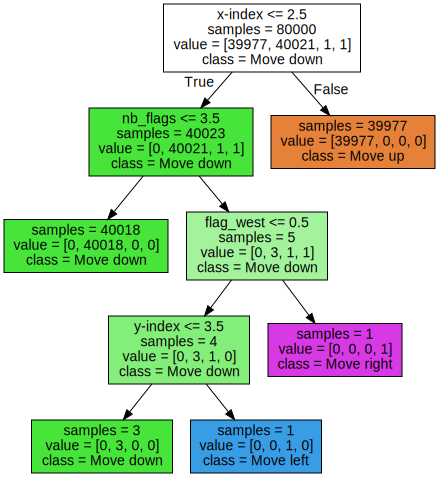

In [109]:
from src.tree import visualize_tree
graph = visualize_tree(env,Tree,feature_names,class_names)
graph.render(filename='img/'+filename[5:-4])
graph